In [197]:
import numpy as np
import pandas as pd
from pivottablejs import pivot_ui
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as sch
%matplotlib inline

# Analise da fonde de dados

In [2]:
country_data_df = pd.read_csv('Country-data.csv')

In [3]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
country_data_df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

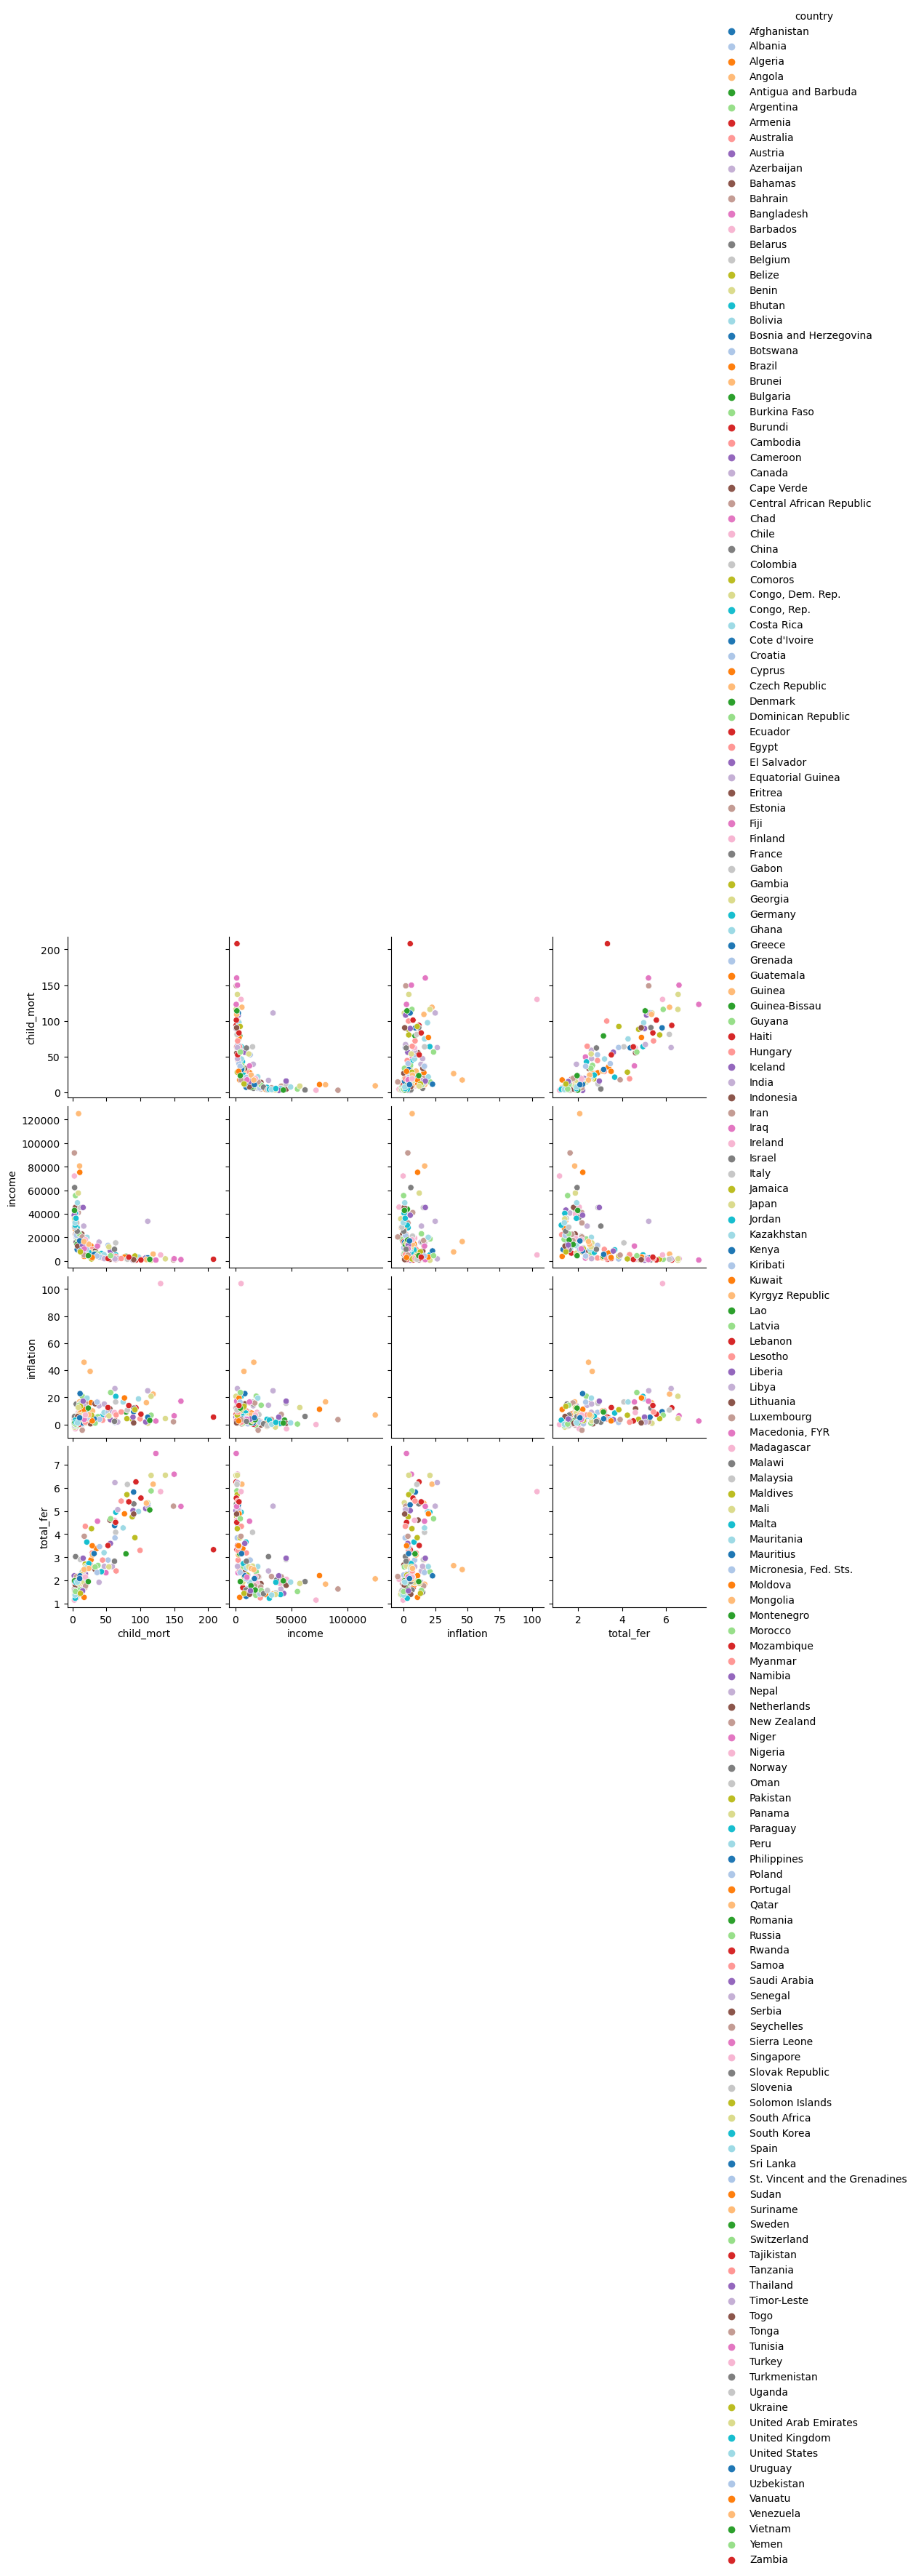

In [104]:
_ = sns.pairplot(country_data_df.loc[:,['child_mort','income','inflation','country','total_fer']],hue='country',palette='tab20', )

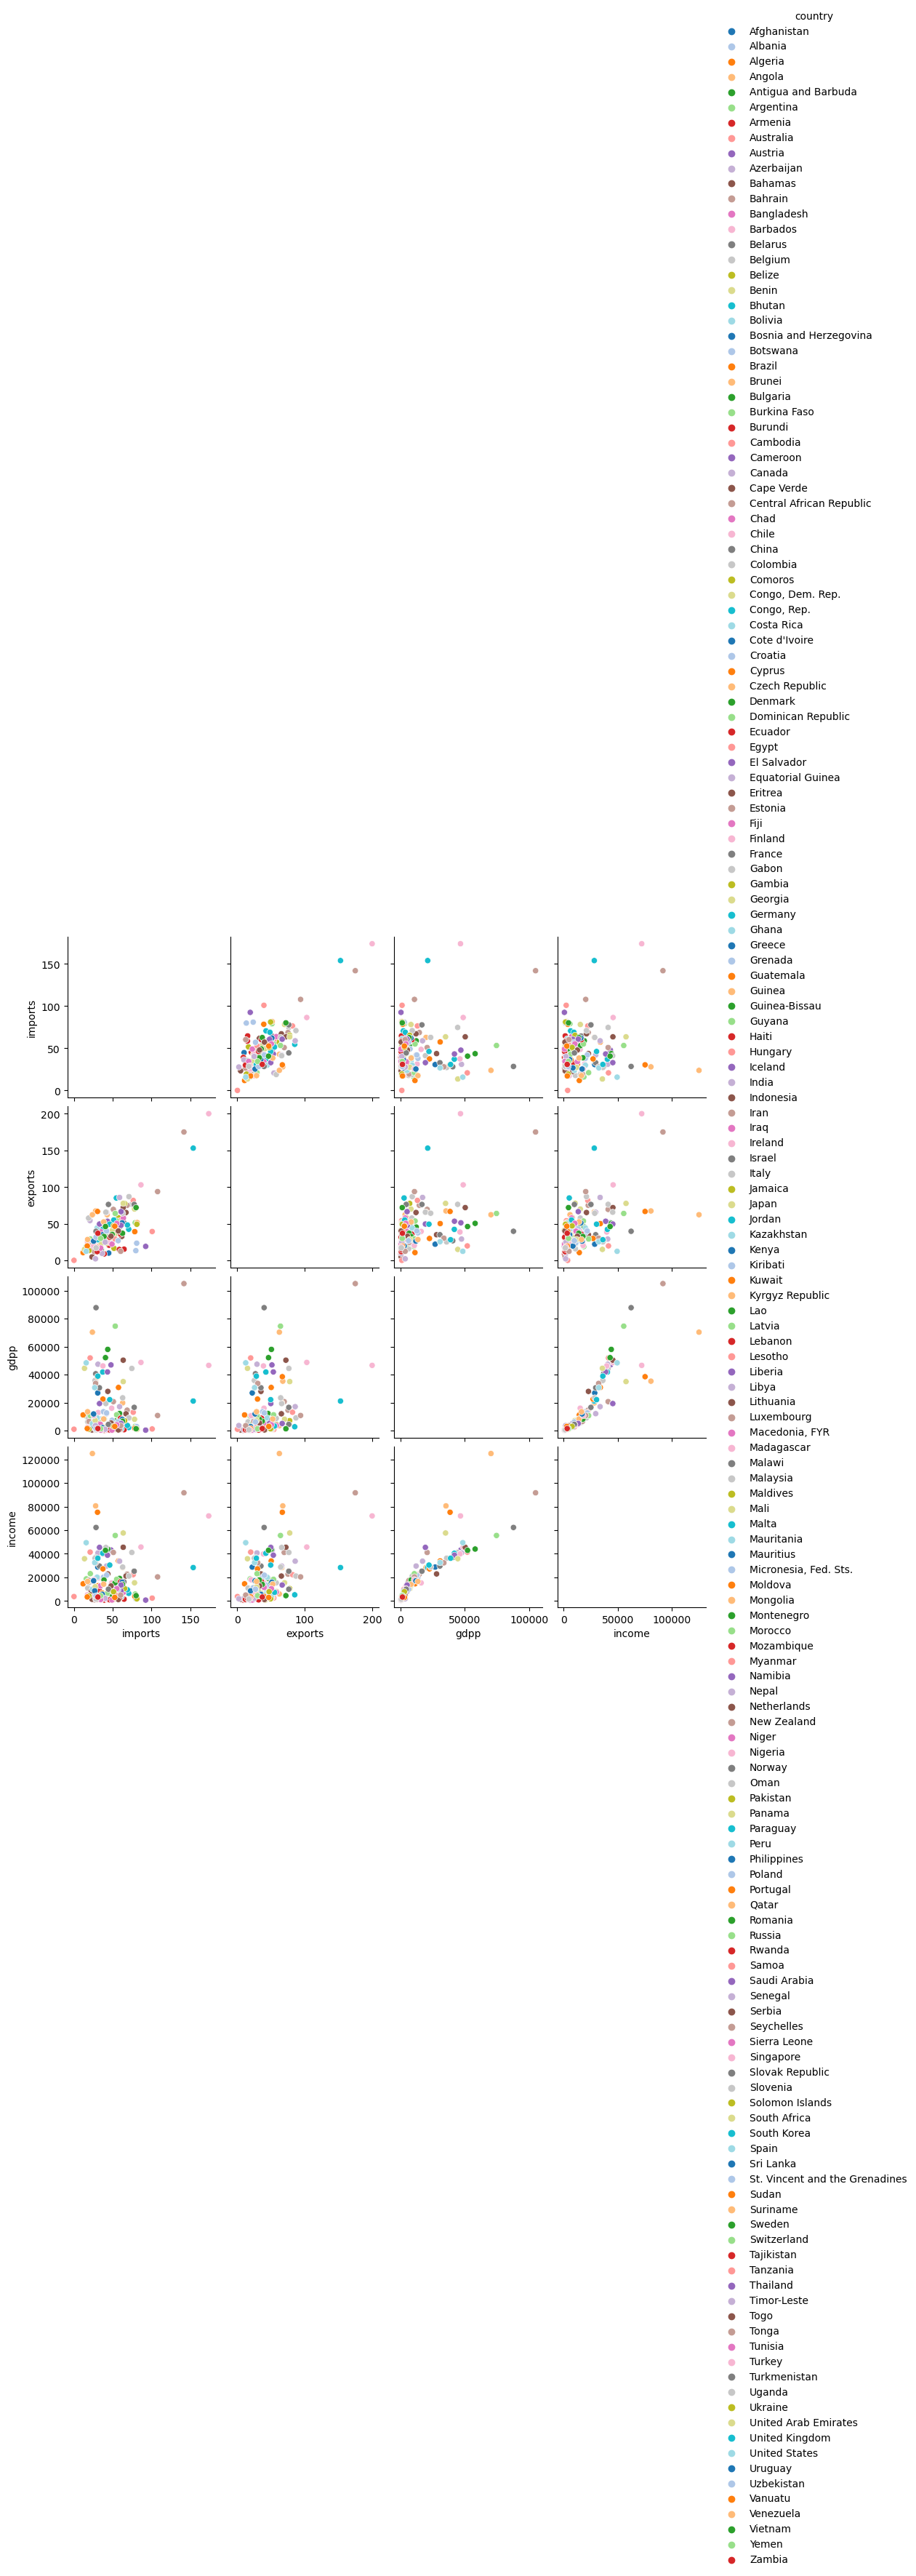

In [105]:
_ = sns.pairplot(country_data_df.loc[:,['imports','exports','gdpp','country','income']],hue='country',palette='tab20' )

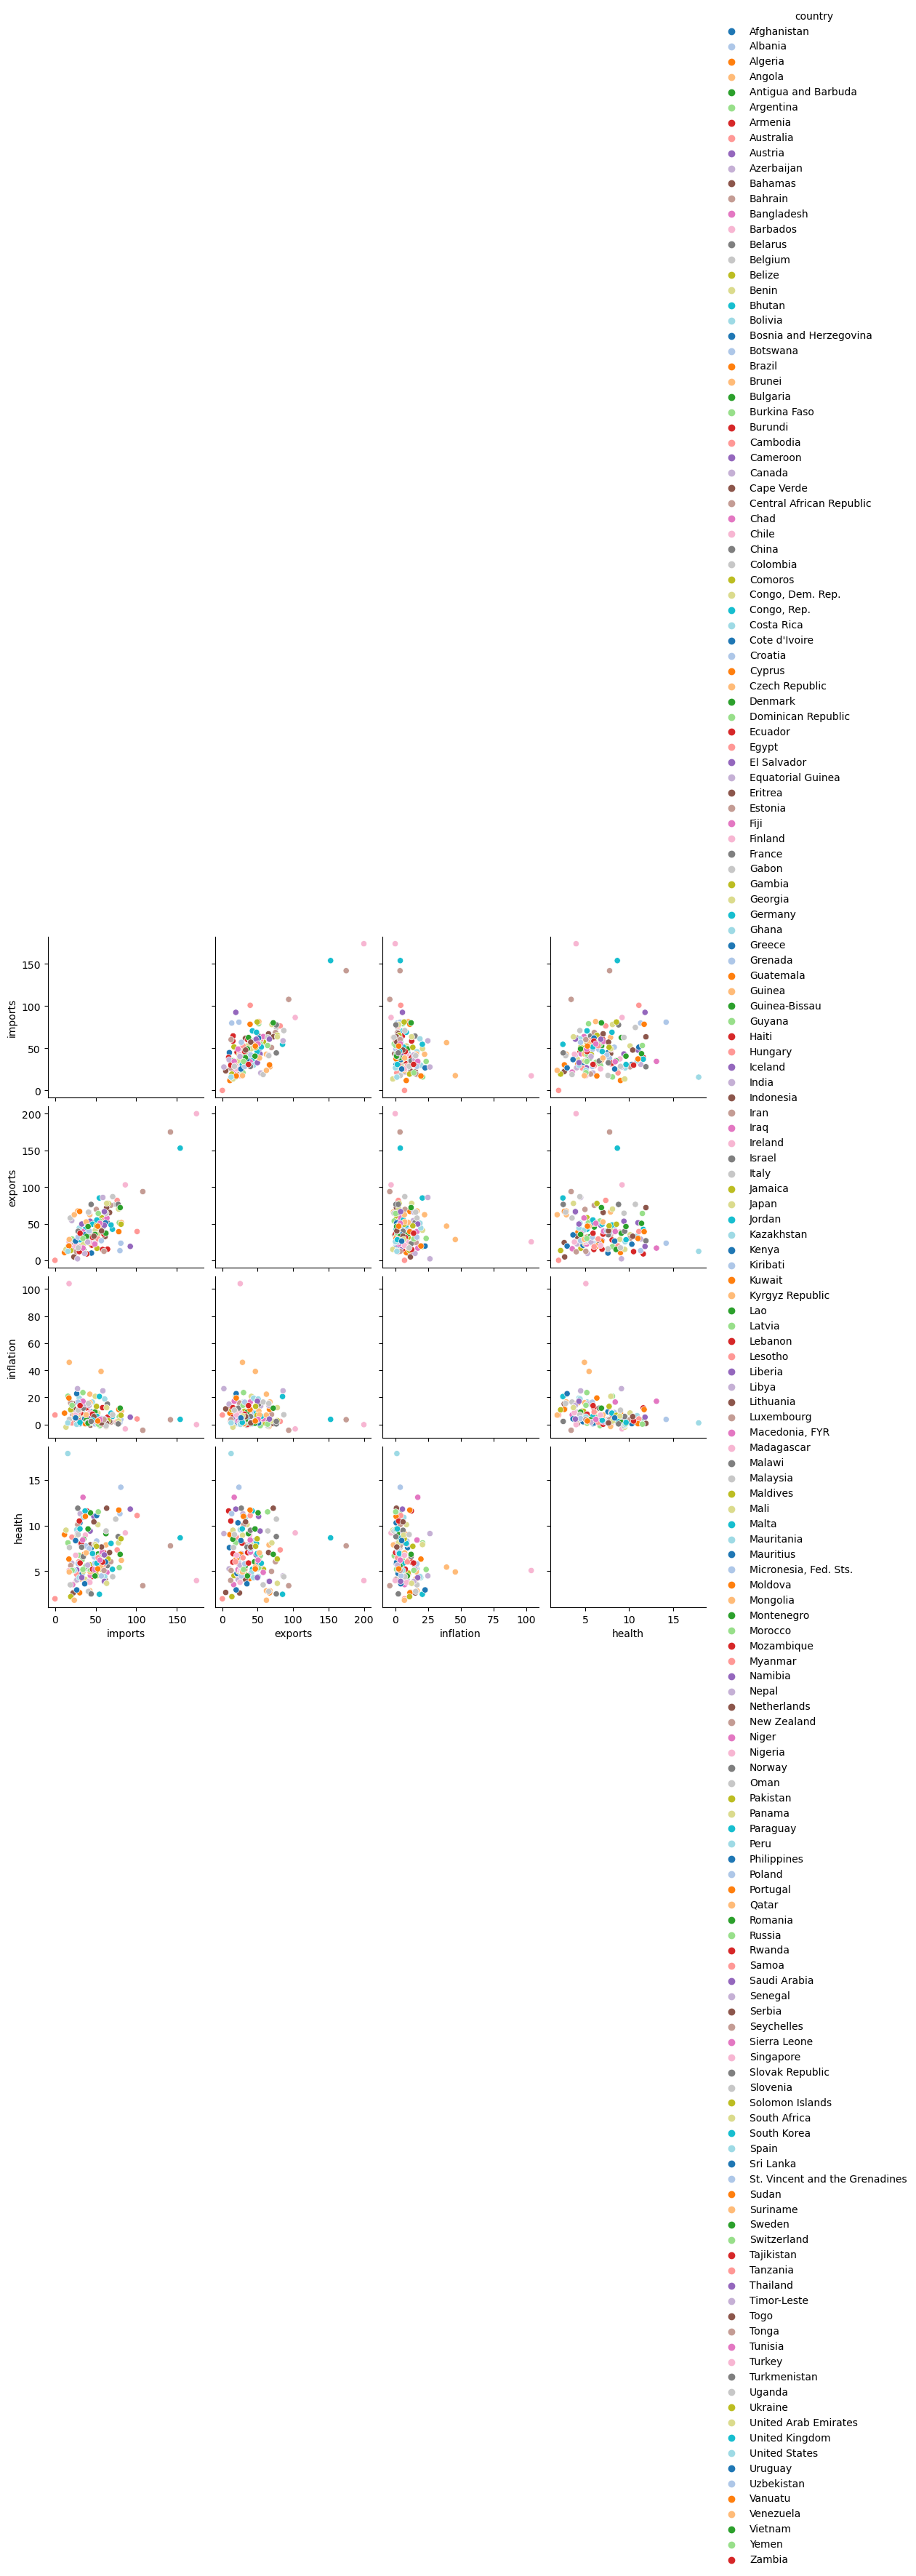

In [106]:
_ = sns.pairplot(country_data_df.loc[:,['imports','exports','inflation','country','health']],hue='country',palette='tab20' )

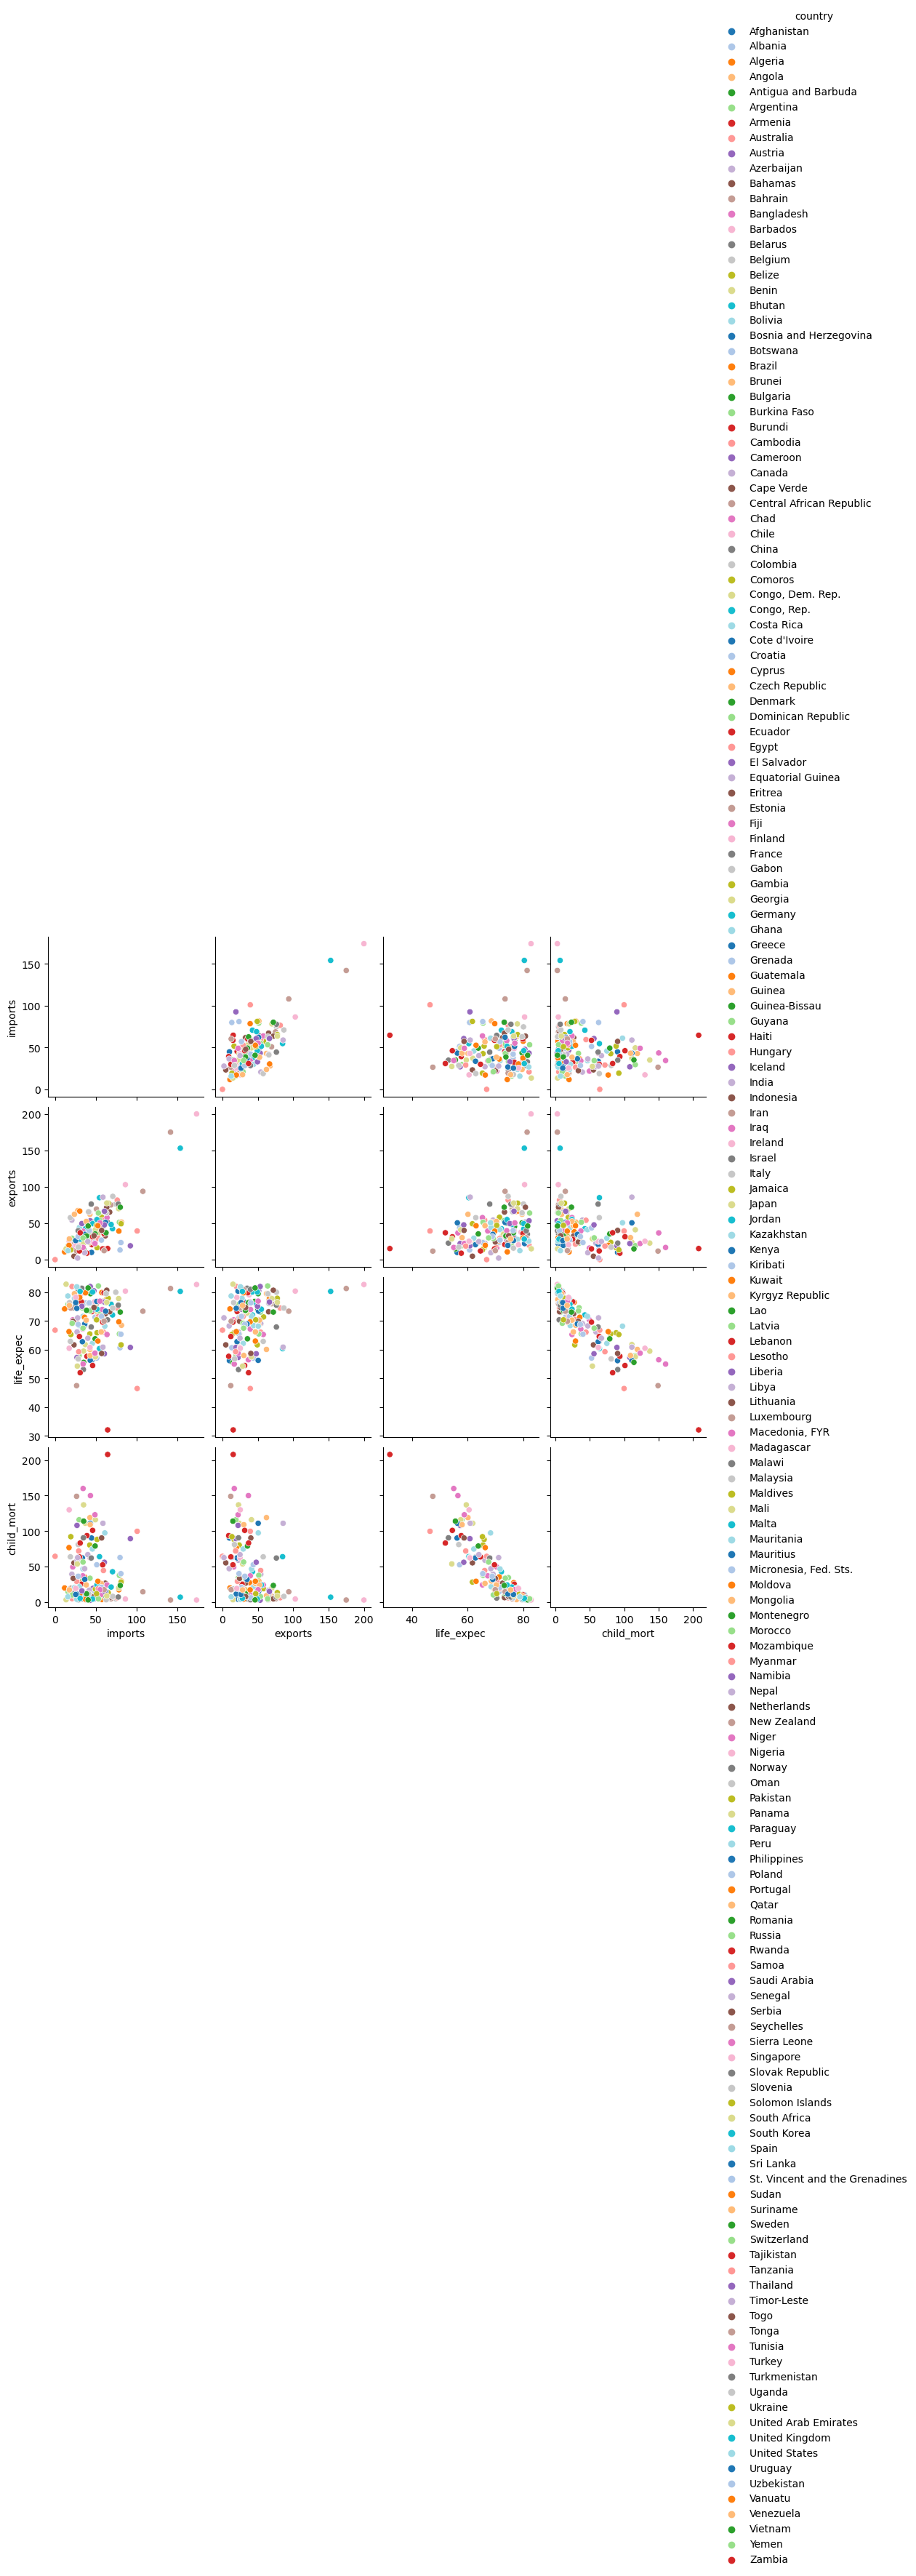

In [107]:
_ = sns.pairplot(country_data_df.loc[:,['imports','exports','life_expec','country','child_mort']],hue='country',palette='tab20' )

Pelos plots anteriores nota-se que alguns países apresentam discrepancias(outliers) em algumas variáveis, alguns exemplos abaixo

Text(0.5, 1.0, 'health')

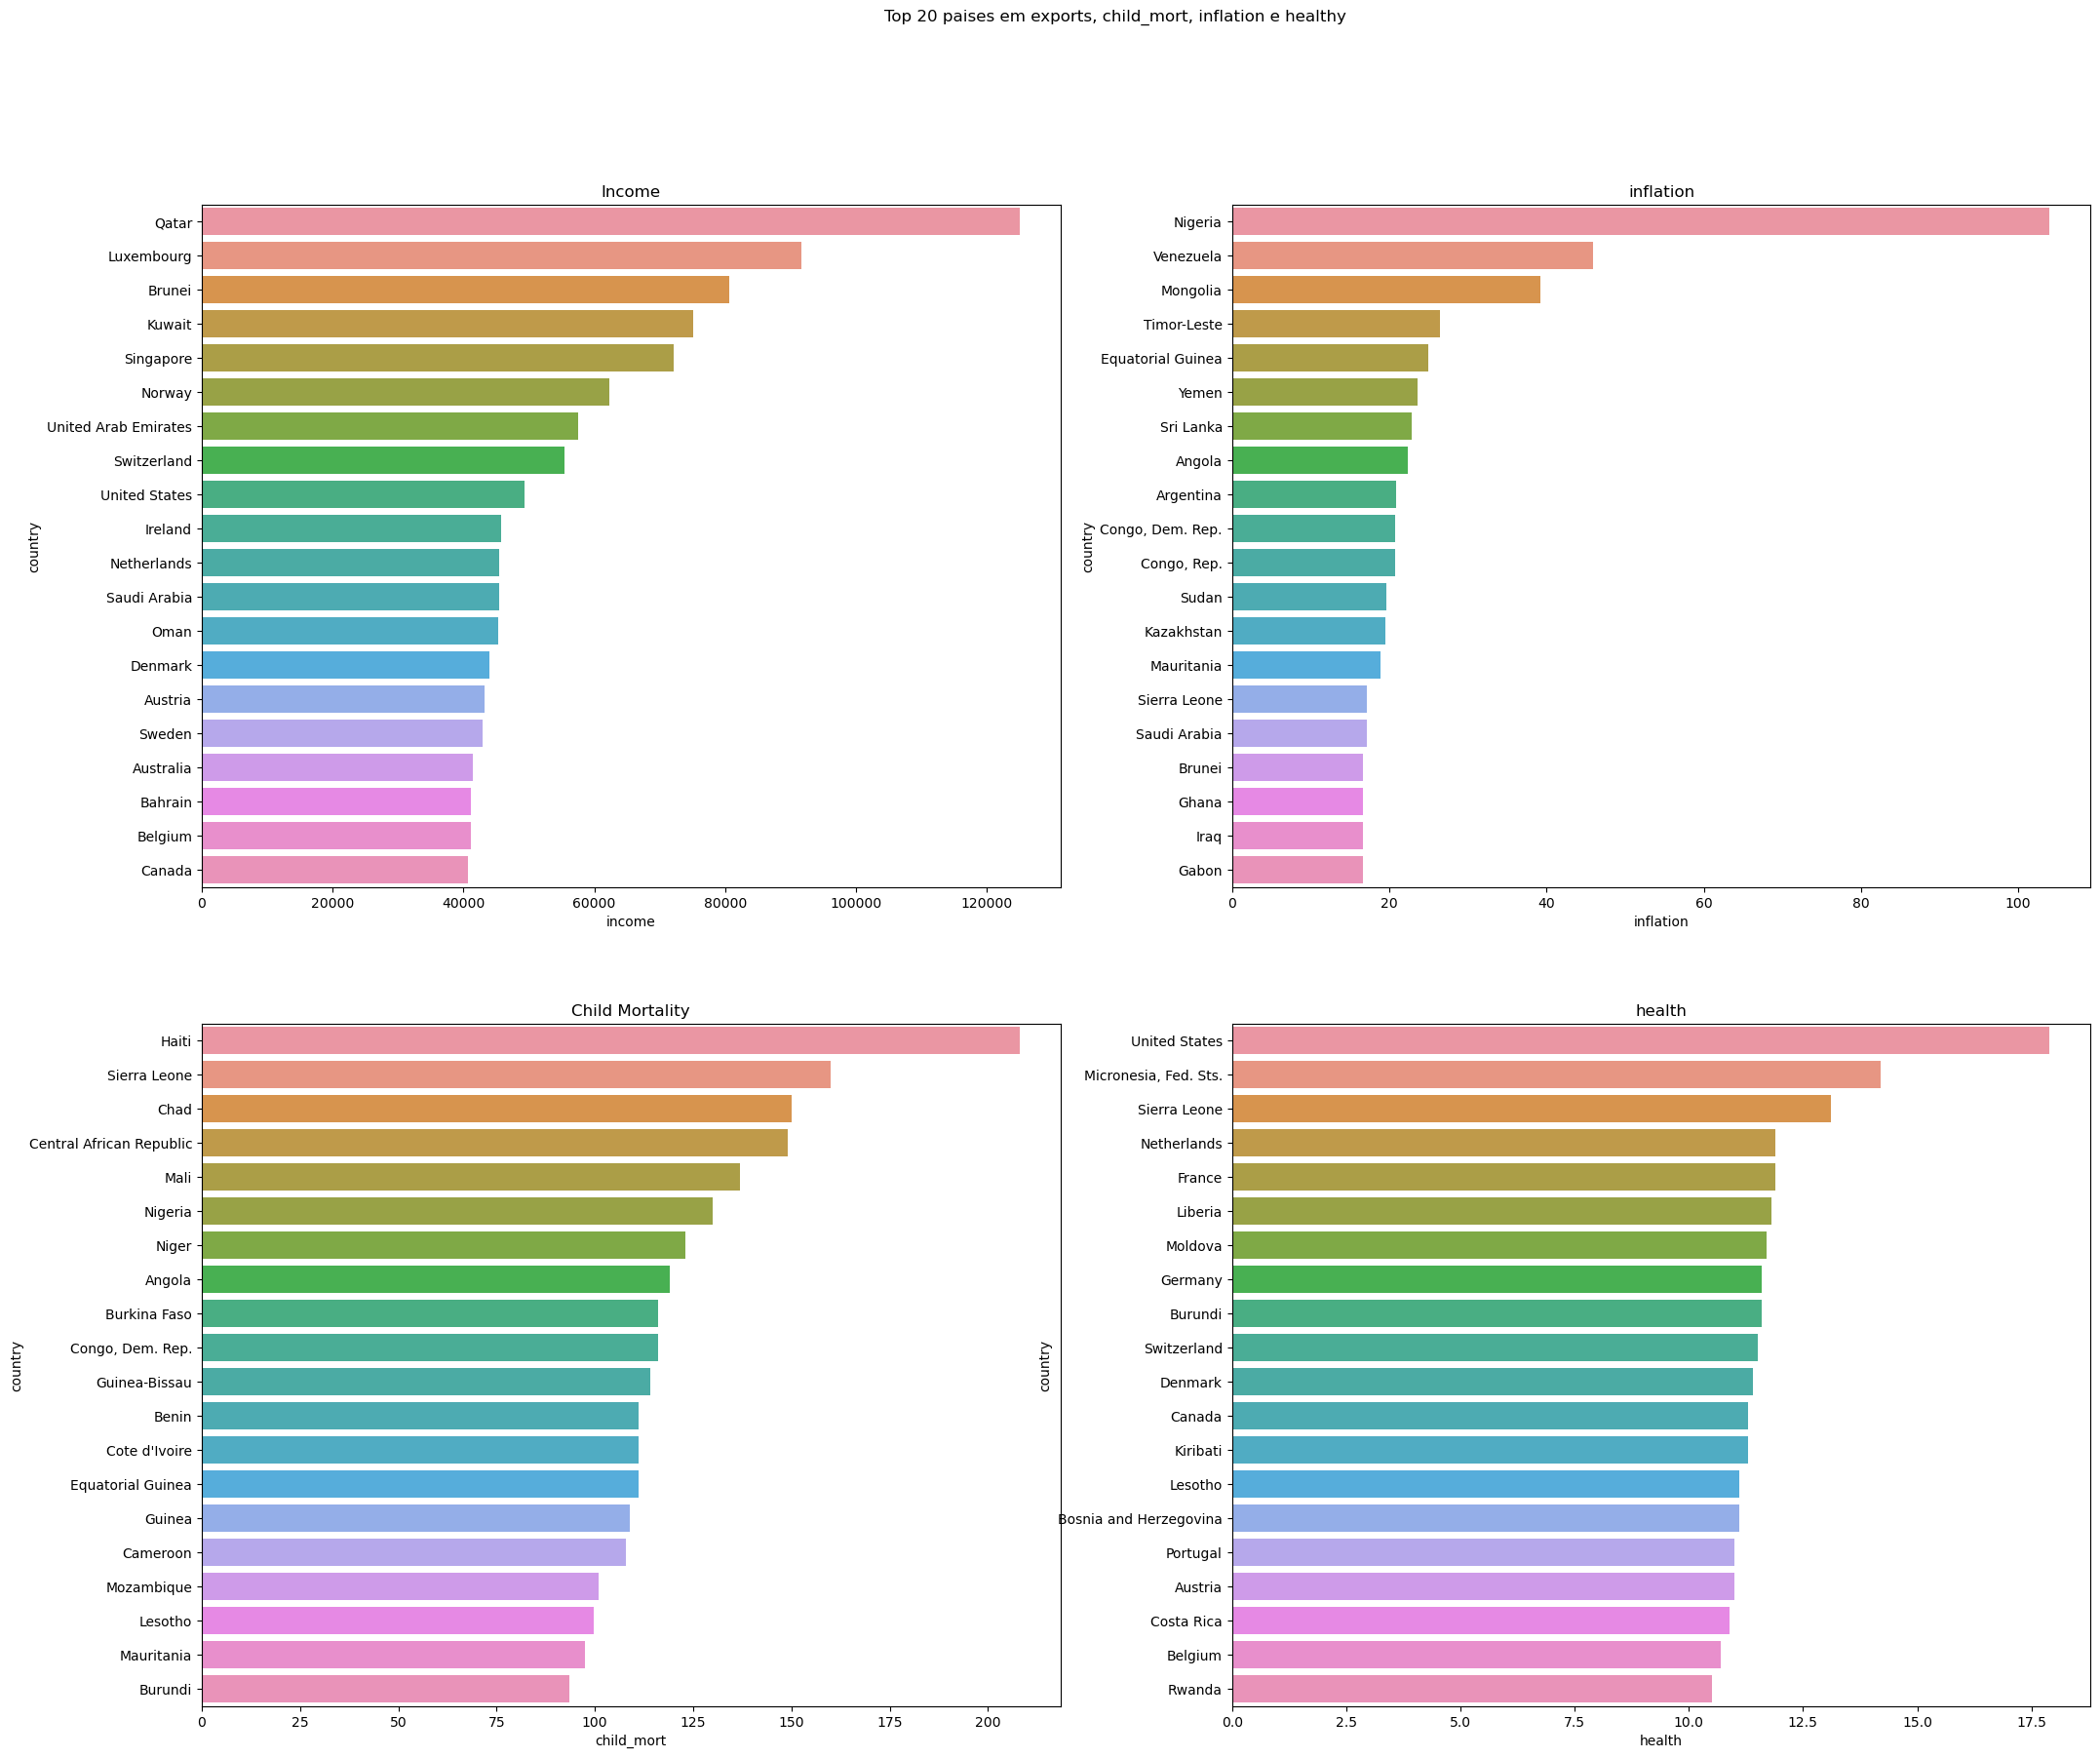

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20),)
fig.suptitle('Top 20 paises em exports, child_mort, inflation e healthy')


sns.barplot(ax=axes[1,0],data = country_data_df[['child_mort','country']].sort_values(by='child_mort',ascending=False).head(20),x='child_mort', y='country',)
axes[1,0].set_title('Child Mortality')

sns.barplot(ax=axes[0,0],data = country_data_df[['income','country']].sort_values(by='income',ascending=False).head(20),x='income', y='country',)
axes[0,0].set_title('Income')

sns.barplot(ax=axes[0,1],data = country_data_df[['inflation','country']].sort_values(by='inflation',ascending=False).head(20),x='inflation', y='country',)
axes[0,1].set_title('inflation')

sns.barplot(ax=axes[1,1],data = country_data_df[['health','country']].sort_values(by='health',ascending=False).head(20),x='health', y='country',)
axes[1,1].set_title('health')


<AxesSubplot:>

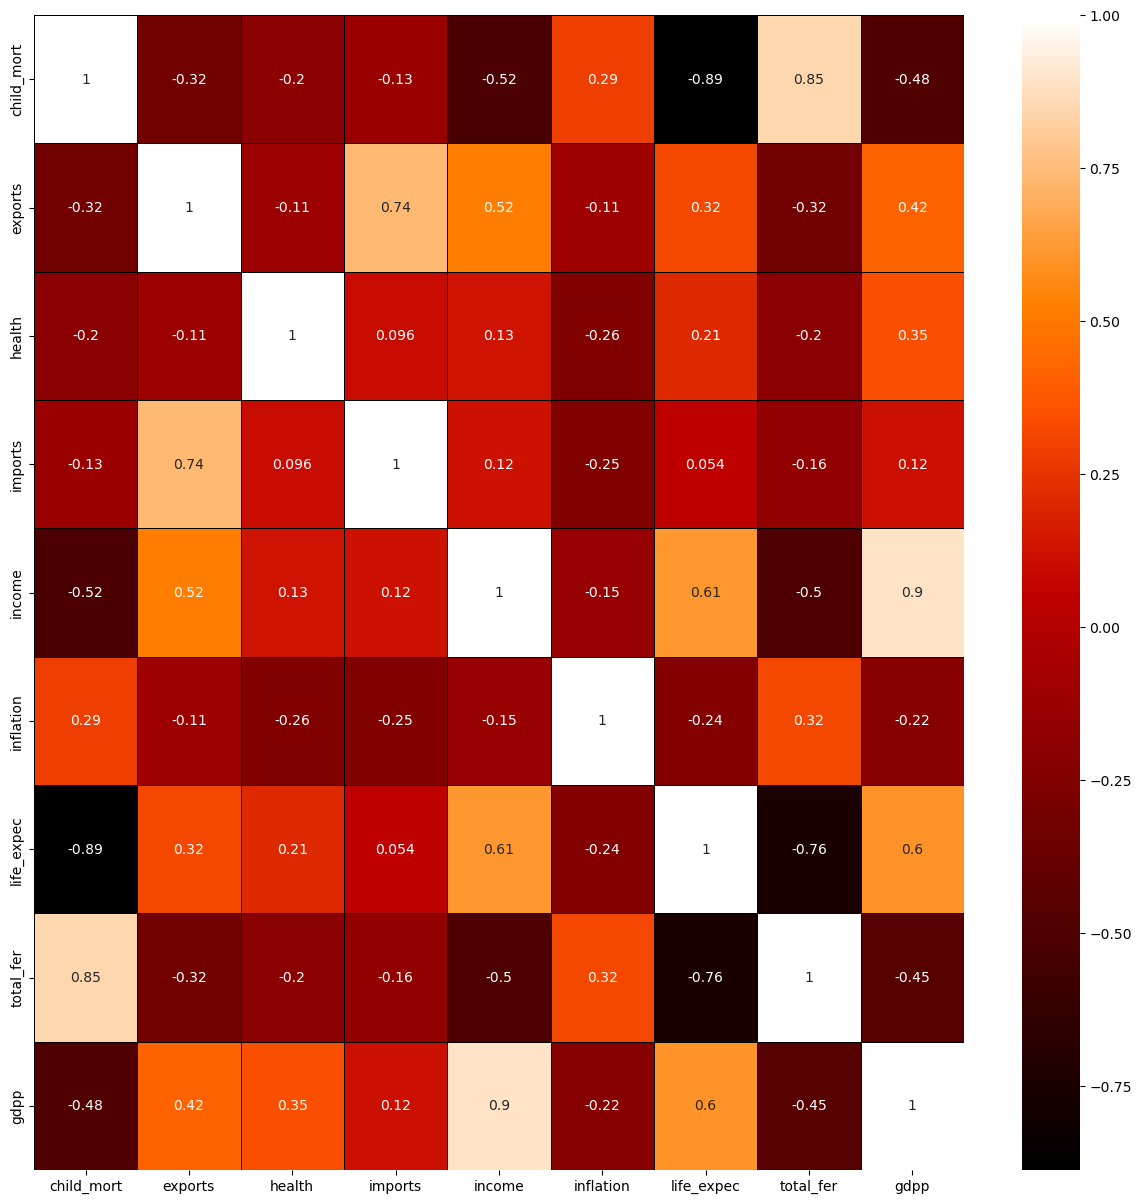

In [220]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(country_data_df.corr(), annot=True,cmap='gist_heat', linecolor='black',linewidths=0.5)

Pela matrix de correlação acima, algumas variáveis se destacam:
- **life_expec** e **child_mor** são inversamente proporcionais, em contra partida **child_mor** e **total_fer** estão proximas a total proporcionalidade  
- **imports** e **exports** são relativamente proporcionais, entretanto **exports** possui uma correlação signficativa com **income**, mas imports possui pouca relevância com outras variáveis, logo a mesma será descartada.
- Paises com maior expectativa de vida tendem a ter maior pib.

# Clusterização

Conforme solicitado pelo trabalho, a clusterização será feita por Kmean com número de clusters setado para 3.

In [133]:
stand_esc = StandardScaler()
column_list = ['child_mort', 'exports', 'health', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
stand_esc.fit(country_data_df[column_list])

StandardScaler()

In [134]:
stand_country_data = stand_esc.transform(country_data_df[column_list])
stand_country_data_df = pd.DataFrame(stand_country_data,columns=column_list)
stand_country_data_df.describe().T

count          mean       std       min       25%       50%  \
child_mort  167.0 -2.659217e-17  1.003008 -0.887138 -0.746619 -0.471798   
exports     167.0  2.383323e-16  1.003008 -1.500192 -0.633337 -0.223528   
health      167.0  5.218713e-16  1.003008 -1.827827 -0.692211 -0.181001   
income      167.0 -7.512288e-17  1.003008 -0.860326 -0.717456 -0.373808   
inflation   167.0  3.988825e-18  1.003008 -1.137852 -0.566641 -0.226950   
life_expec  167.0  3.616535e-16  1.003008 -4.337186 -0.592758  0.286958   
total_fer   167.0  3.124580e-16  1.003008 -1.191250 -0.763902 -0.356431   
gdpp        167.0  2.127373e-17  1.003008 -0.696801 -0.636660 -0.454431   

                 75%       max  
child_mort  0.592667  4.221297  
exports     0.374720  5.813835  
health      0.651541  4.047436  
income      0.294237  5.611542  
inflation   0.281636  9.129718  
life_expec  0.704258  1.380962  
total_fer   0.617525  3.009349  
gdpp        0.059421  5.036507

###### processo de clusterização

In [135]:
kmean= KMeans(n_clusters=3,random_state=10)
data_fited = kmean.fit(stand_country_data_df)
dist = data_fited.fit_transform(stand_country_data_df)
country_data_df['cluster'] = data_fited.labels_
country_data_df['cluster_dist'] = [dist[x,country_data_df.loc[x,'cluster']] for x in country_data_df.index ]
group_by_cluster = country_data_df.groupby(by='cluster')

#### Distribuição por cluster

In [136]:
group_by_cluster.mean().T

cluster                  0            1             2
child_mort       21.695238    91.610417      4.897143
exports          40.484393    29.571042     58.431429
health            6.158333     6.433542      8.917429
imports          47.112689    43.133333     51.508571
income        12773.690476  3897.354167  45802.857143
inflation         7.608405    11.911146      2.535000
life_expec       72.984524    59.239583     80.245714
total_fer         2.282738     4.992083      1.741143
gdpp           6717.523810  1909.208333  43117.142857
cluster_dist      1.440103     1.928582      2.095758

In [137]:
group_by_cluster.std().T

cluster                 0            1             2
child_mort      13.816900    34.319855      2.130795
exports         19.271103    18.200215     42.501749
health           2.155652     2.651959      3.154562
imports         19.760336    18.418658     37.381754
income        8680.231908  5590.168621  21141.490928
inflation        7.849052    15.362485      4.053256
life_expec       3.780498     6.384914      1.696596
total_fer        0.663623     1.036192      0.371814
gdpp          5222.016779  2925.911009  18891.773587
cluster_dist     0.592799     1.239419      1.323120

In [138]:
group_by_cluster.min().T

cluster              0            1          2
country        Albania  Afghanistan  Australia
child_mort         4.5         28.1        2.6
exports          0.109          2.2       12.4
health            1.97          2.2       1.81
imports         0.0659         17.2       13.6
income            1990          609      25200
inflation        -4.21        0.885      -3.22
life_expec        63.0         32.1       75.5
total_fer         1.25         2.59       1.15
gdpp               592          231      16600
cluster_dist  0.651516     0.763966   0.643834

In [139]:
group_by_cluster.max().T

cluster              0        1              2
country        Vietnam   Zambia  United States
child_mort        64.4    208.0           10.8
exports           93.8     85.8          200.0
health            14.2     13.1           17.9
imports          108.0    101.0          174.0
income           45400    33700         125000
inflation         45.9    104.0           16.7
life_expec        80.4     71.1           82.8
total_fer         4.34     7.49           3.03
gdpp             28000    17100         105000
cluster_dist  3.725468  8.82471        5.96415

In [140]:
group_by_cluster.quantile([.25,.5,.75]).T

/var/folders/4l/fn8t415x6zsc526_g2zr22km0000gn/T/ipykernel_14697/1649101716.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  group_by_cluster.quantile([.25,.5,.75]).T


cluster                 0                                       1  \
                     0.25          0.50          0.75        0.25   
child_mort      11.425000     18.100000     27.750000    63.67500   
exports         26.750000     37.300000     51.450000    17.02500   
health           4.855000      5.875000      7.150000     4.52500   
imports         32.150000     48.650000     60.225000    29.90000   
income        6707.500000  10450.000000  17175.000000  1390.00000   
inflation        2.367500      5.805000     10.025000     4.08000   
life_expec      70.375000     73.750000     76.100000    56.72500   
total_fer        1.750000      2.215000      2.652500     4.47500   
gdpp          2970.000000   4850.000000   9377.500000   551.50000   
cluster_dist     1.053037      1.244639      1.688194     1.22945   

cluster                                            2                \
                     0.50         0.75          0.25          0.50   
child_mort      89.750000   111.000000      3.500000      4.200000   
exports         24.350000    39.400000     29.500000     50.200000   
health           5.675000     8.327500      7.825000      9.480000   
imports         41.500000    50.025000     28.300000     37.400000   
income        1860.000000  3522.500000  32400.000000  40400.000000   
inflation        8.855000    16.600000      0.418000      1.160000   
life_expec      59.800000    62.825000     79.650000     80.400000   
total_fer        5.055000     5.597500      1.435000      1.790000   
gdpp           932.000000  1465.000000  30750.000000  41800.000000   
cluster_dist     1.723404     2.137914      1.351111      1.683132   

cluster                     
                      0.75  
child_mort        5.400000  
exports          67.050000  
health           10.850000  
imports          62.900000  
income        47550.000000  
inflation         3.420000  
life_expec       81.400000  
total_fer         1.940000  
gdpp          48550.000000  
cluster_dist      2.241762

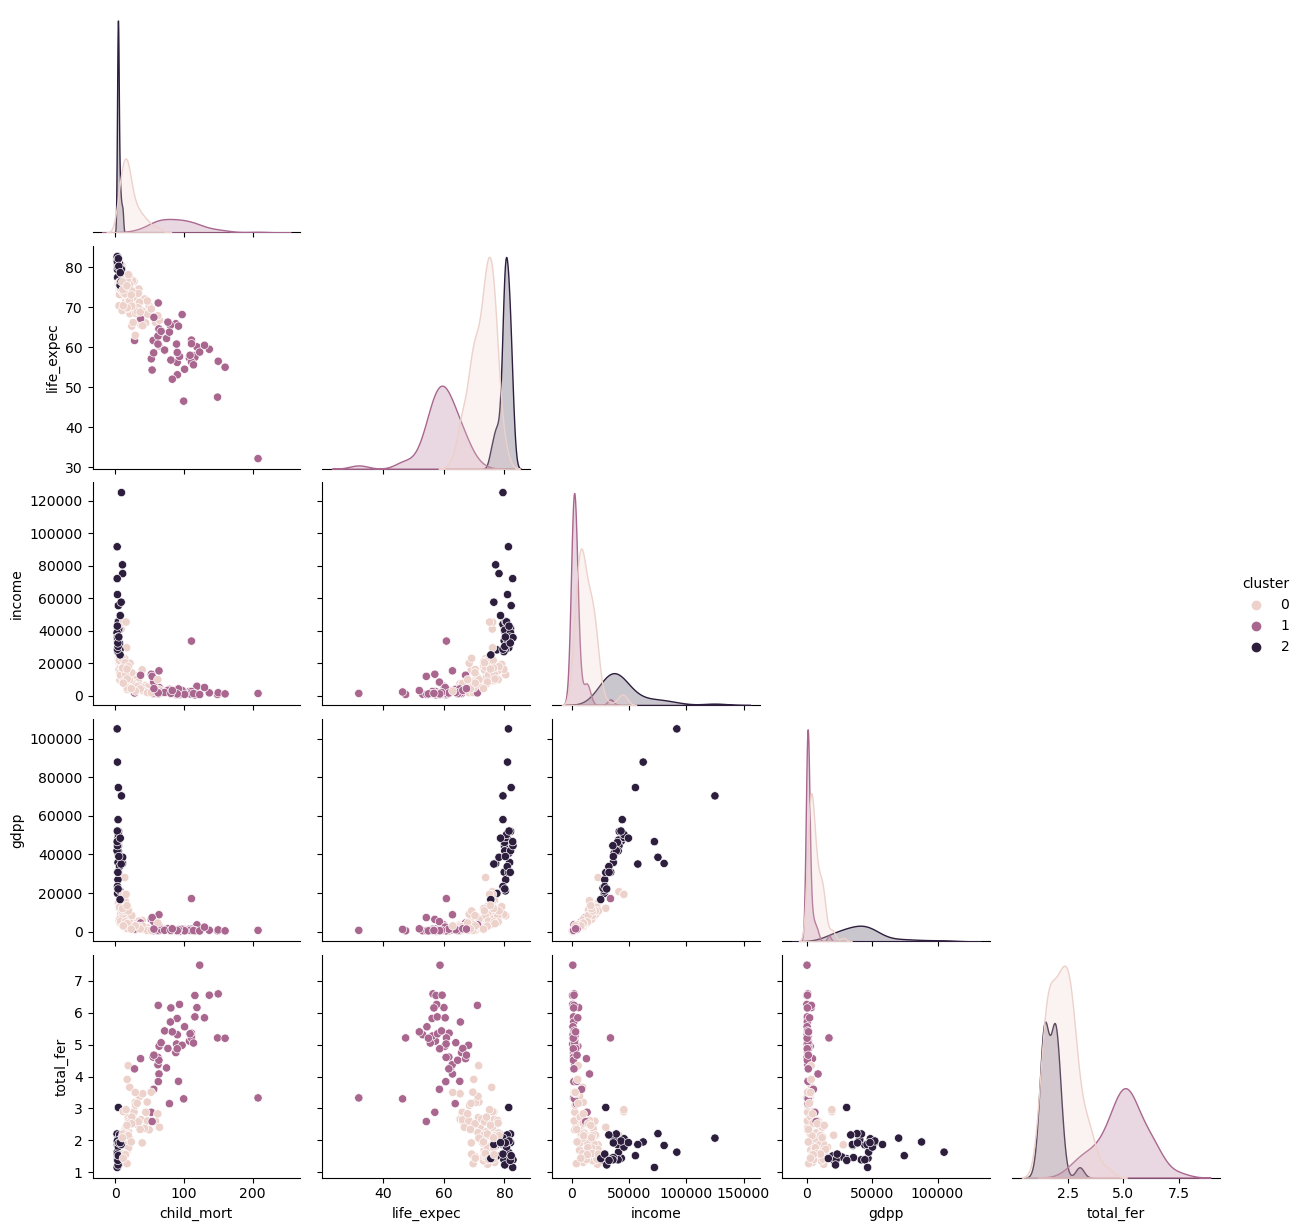

In [141]:
_ = sns.pairplot(country_data_df.loc[:,['child_mort','life_expec','income','cluster','gdpp','total_fer']],hue='cluster', corner=True)

O resultado apresenta uma clusterização soft com ruídos pontuais. Em todos os casos os outliers foram agredados ao cluster mais próximo devido a distância euclidiana, mas as zonas de fronteira entre estes não possuim resolução clara.
Pela segregação, o algoritmo dividiu os países entre em desenvolvimento, sub-desenvolvidos e desenvolvidos.

Abaixo estão os países mais próximos em representão do cluster, os mesmos foram escolhidos baseados na menor distância euclidiana ao centro do cluster.

In [144]:
group_by_cluster.min()

country  child_mort  exports  health  imports  income  inflation  \
cluster                                                                         
0            Albania         4.5    0.109    1.97   0.0659    1990     -4.210   
1        Afghanistan        28.1    2.200    2.20  17.2000     609      0.885   
2          Australia         2.6   12.400    1.81  13.6000   25200     -3.220   

         life_expec  total_fer   gdpp  cluster_dist  
cluster                                              
0              63.0       1.25    592      0.651516  
1              32.1       2.59    231      0.763966  
2              75.5       1.15  16600      0.643834

## Cluster Hieráquico

Text(0, 0.5, 'Euclidean Distance')

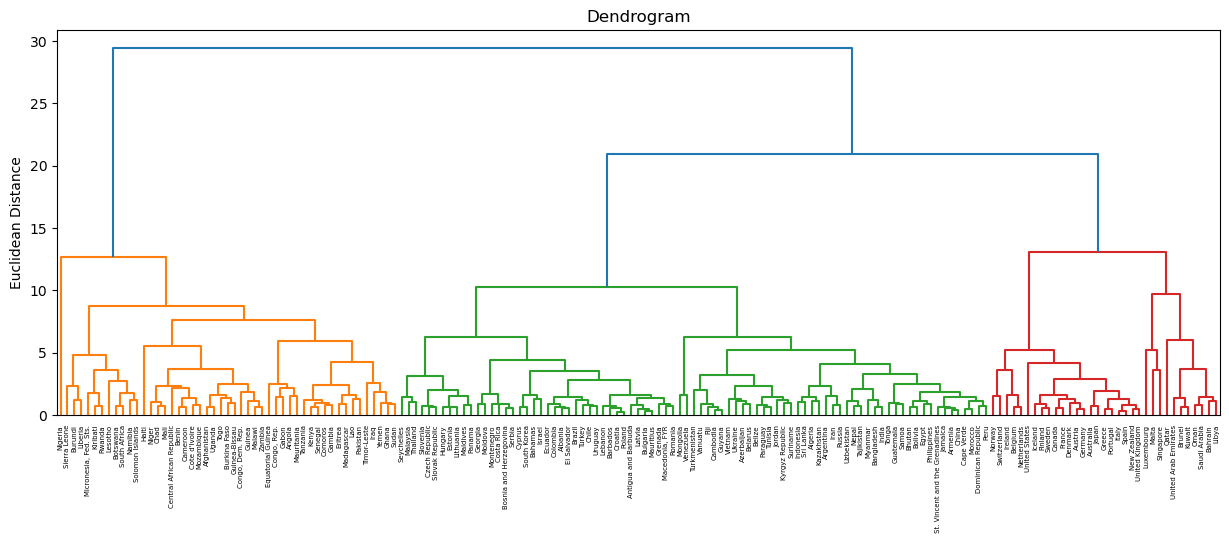

In [230]:
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(stand_country_data_df, method='ward'), labels=country_data_df.country.values)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')


O agrupamento permaneceu em 3, inclusive os países representantes de cada cluster do exemplo anterior permaneceram cada um dentro de seus respectivo grupo. Entretanto com o dendograme é possível ter uma observação mais ampla do cenário global, podendo destacar:
- O maior grupo são dos países em desenvolvimento, seguido pelos subdesenvolvidos
- Considerando que os dados são um retrato histórico, é possivel verificar países que estão a margem de tornarem-se subdesenvolvidos e países que estão próximos à alcançarem padrões mínimos dos desenvolvidos, caso dados históricos estivesem disponíveis, seria possível prever quais moveriam-se para qual grupo.
- Os outliers repousam nos grupos extremos, alguns países destacam-se positiva ou negativamente, em suas features a ponto de serem assimilados a partir da 5 ou até mesmo da ultima layer, logo países em desenvolvimento tendem a ter valores de features mais homogêneos.

De maneira geral os resultados de ambos os métodos estão proximos, entretando para o caso presente a clusterização hieráquica aglomerativa apresentou uma deliamento de fronteira menos caótico no dendograma, deixando claro que os países são um concorrentes a mudar de categoria, inclusive os outliers aparentam não estarem em seu grupo por acaso, pois por mais pobre que um país seja ele ainda será considerado subdesenvolvido, da mesma forma que o mais rico ainda assim estará no grupo de desenvolvidos.

##### Descrição dos algoritmo K-means

Partindo do pressuposto que os dados estão tratados, o algoritmo trabalha da seguinte forma:

1. São escolhidos pontos aleatórios no plano, de acordo com a quantidade de clusters pre-definida, tais pontos são os centros dos clusters;
2. Calcula a distancia de cada ponto para o centro dos clusters;
3. Nomeia o ponto para um cluster de acordo com a distancia dele para o centro do mesmo.
4. Calcula o novo centro para o cluster baseado nos dados recem assimilados.
5. Repita o passo 2 ao 4 até que a variação no deslocamento do centro do cluster esteja abaixo de um limiar previamento estabelecido ou que a quantidade de interrações seja maior do que a pre estabelecida.


Para garantir que o centroid do cluster seja um dado válido o método de Kmedoide deve ser utilizado, o mesmo funciona com o seguinte algoritmo :
1. Seleciona um numéro de dados previamente informado para se tornarem o centroide dos clusters;
2. Calcula a distancia de cada ponto para o centro dos clusters;
3. Nomeia o ponto para um cluster de acordo com a menor distancia dele para o centroide do mesmo;
4. Recalcula as dissimilaridades para verificar qual ponto será o novo centroide do cluster;
5. Repita o passo 2 ao 4 até que a variação no deslocamento do centro do cluster esteja abaixo de um limiar previamento estabelecido ou que a quantidade de interrações seja maior do que a pre estabelecida.

#### K-means e outliers

Kmeans é um algoritmo de clusterização sensível a outliers, pois como mencionado nas célculas anteriores, o calcúlo do centro de um cluster é baseado na distancia quadratica euclidiana média de todos os pontos dentro do mesmo, sendo que todos os pontos dos dados são assimilados por um cluster, logo ao calcular a média das distancias a mesma sofrerá um desvio por conta dos outliers, com isso o baricentro é deslocado o que pode resultar com iteração seguinte assimilando mais pontos para o cluster.

#### DBSCAN

Algoritmos DBSCAN são mais robustos a outliers porque não necessariamente considera todo os pontos como pertencentes a um cluster. Diferente do Kmeans, o DBSCAN necessita de um número minimo de pontos por cluster e um valor de distancia máxima para um pontos ser considerado vizinho do cluster, logo outliers estarão acima desta amplitude e não serão considerados parte de um cluster e com isso o centroide de um cluster não é afetado pelo menos.